In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import regex as re
from IPython.display import display, Markdown

In [55]:
df = pd.read_csv("skyscrapers.csv")
df

id   material                      name  location.city  \
0        12      steel              The Illinois        Chicago   
1        62  composite             Chicago Spire        Chicago   
2        68  composite  Miglin-Beitler Skyneedle        Chicago   
3        98  composite    One World Trade Center  New York City   
4     14269   concrete        Central Park Tower  New York City   
...     ...        ...                       ...            ...   
2426  18633   concrete           Hallets Point 2  New York City   
2427  18635   concrete           Hallets Point 3  New York City   
2428  18636   concrete           Hallets Point 4  New York City   
2429  18637   concrete           Hallets Point 5  New York City   
2430  18638   concrete           Hallets Point 6  New York City   

      location.city_id location.country  location.country id  \
0                 1539               US                  163   
1                 1539               US                  163   
2                 1539               US                  163   
3                 1641               US                  163   
4                 1641               US                  163   
...                ...              ...                  ...   
2426              1641               US                  163   
2427              1641               US                  163   
2428              1641               US                  163   
2429              1641               US                  163   
2430              1641               US                  163   

      location.latitude  location.longitude  purposes.abandoned  ...  \
0              0.000000            0.000000                True  ...   
1             41.889889          -87.614861                True  ...   
2             41.881618          -87.634354                True  ...   
3             40.713112          -74.013351                True  ...   
4             40.766361          -73.980949                True  ...   
...                 ...                 ...                 ...  ...   
2426           0.000000            0.000000                True  ...   
2427           0.000000            0.000000                True  ...   
2428           0.000000            0.000000                True  ...   
2429           0.000000            0.000000                True  ...   
2430           0.000000            0.000000                True  ...   

      purposes.telecommunications  statistics.floors above  statistics.height  \
0                            True                      528        1609.359985   
1                            True                      150         609.599976   
2                            True                      125         609.489990   
3                            True                       94         541.299988   
4                            True                       95         541.020020   
...                           ...                      ...                ...   
2426                         True                        0           0.000000   
2427                         True                        0           0.000000   
2428                         True                        0           0.000000   
2429                         True                        0           0.000000   
2430                         True                        0           0.000000   

      statistics.number of purposes  statistics.rank      status.current  \
0                                 4                1              vision   
1                                 1                2     never completed   
2                                 1                3              vision   
3                                 1                4           completed   
4                                 3                5  under construction   
...                             ...              ...                 ...   
2426                              1             2423            p

In [15]:
df.columns

Index(['id', 'material', 'name', 'location.city', 'location.city_id',
       'location.country', 'location.country id', 'location.latitude',
       'location.longitude', 'purposes.abandoned',
       'purposes.air traffic control tower', 'purposes.belltower',
       'purposes.bridge', 'purposes.casino', 'purposes.commercial',
       'purposes.education', 'purposes.exhibition', 'purposes.government',
       'purposes.hospital', 'purposes.hotel', 'purposes.industrial',
       'purposes.library', 'purposes.multiple', 'purposes.museum',
       'purposes.observation', 'purposes.office', 'purposes.other',
       'purposes.religious', 'purposes.residential', 'purposes.retail',
       'purposes.serviced apartments', 'purposes.telecommunications',
       'statistics.floors above', 'statistics.height',
       'statistics.number of purposes', 'statistics.rank', 'status.current',
       'status.completed.is completed', 'status.completed.year',
       'status.started.is started', 'status.started.yea

In [16]:
df = df.dropna()
df.describe()

id  location.city_id  location.country id  location.latitude  \
count   2430.000000       2430.000000               2430.0        2430.000000   
mean   11483.231276       1613.501646                163.0          36.970499   
std     6695.517488         78.674809                  0.0           8.706731   
min       12.000000       1499.000000                163.0           0.000000   
25%     4129.250000       1543.000000                163.0          34.051141   
50%    11462.500000       1632.000000                163.0          40.725140   
75%    16577.000000       1641.000000                163.0          41.876400   
max    24079.000000       2365.000000                163.0          61.215210   

       location.longitude  statistics.floors above  statistics.height  \
count         2430.000000              2430.000000        2430.000000   
mean           -86.325926                35.629218         132.459568   
std             23.689095                17.518242          67.835546   
min           -157.980072                 0.000000           0.000000   
25%            -92.464857                26.000000          99.014999   
50%            -83.045795                34.000000         124.000000   
75%            -73.994534                43.000000         156.970001   
max              0.000000               528.000000        1609.359985   

       statistics.number of purposes  statistics.rank  status.completed.year  \
count                    2430.000000      2430.000000            2430.000000   
mean                        1.116461      1215.588477            1886.641152   
std                         0.350288       701.861243             427.438438   
min                         1.000000         1.000000               0.000000   
25%                         1.000000       608.250000            1964.250000   
50%                         1.000000      1215.500000            1988.000000   
75%                         1.000000      1822.750000            2008.000000   
max                         4.000000      2423.000000            2020.000000   

       status.started.year  
count          2430.000000  
mean           1253.531687  
std             959.408729  
min               0.000000  
25%               0.000000  
50%            1965.000000  
75%            2005.000000  
max            2016.000000

In [17]:
columns = {}
columns['main'] = df.filter(regex=r'^[^.]*$').columns
columns['location'] = df.filter(regex='location.').columns
columns['purposes'] = df.filter(regex='purposes.').columns
columns['statistics'] = df.filter(regex='statistics.').columns
columns['status'] = df.filter(regex='status').columns
pd.DataFrame.from_dict(columns, orient='index').transpose()

main             location                            purposes  \
0         id        location.city                  purposes.abandoned   
1   material     location.city_id  purposes.air traffic control tower   
2       name     location.country                  purposes.belltower   
3       None  location.country id                     purposes.bridge   
4       None    location.latitude                     purposes.casino   
5       None   location.longitude                 purposes.commercial   
6       None                 None                  purposes.education   
7       None                 None                 purposes.exhibition   
8       None                 None                 purposes.government   
9       None                 None                   purposes.hospital   
10      None                 None                      purposes.hotel   
11      None                 None                 purposes.industrial   
12      None                 None                    purposes.library   
13      None                 None                   purposes.multiple   
14      None                 None                     purposes.museum   
15      None                 None                purposes.observation   
16      None                 None                     purposes.office   
17      None                 None                      purposes.other   
18      None                 None                  purposes.religious   
19      None                 None                purposes.residential   
20      None                 None                     purposes.retail   
21      None                 None        purposes.serviced apartments   
22      None                 None         purposes.telecommunications   

                       statistics                         status  
0         statistics.floors above                 status.current  
1               statistics.height  status.completed.is completed  
2   statistics.number of purposes          status.completed.year  
3                 statistics.rank      status.started.is started  
4                            None            status.started.year  
5                            None                           None  
6                            None                           None  
7                            None                           None  
8                            None                           None  
9                            None                           None  
10                           None                           None  
11                           None                           None  
12                           None                           None  
13                           None                           None  
14                           None                           None  
15                           None                           None  
16                           None                           None  
17                           None                           None  
18                           None                           None  
19                           None                           None  
20                           None                           None  
21                           None                           None  
22                           None                           None

In [18]:
# sns.pairplot(df[columns['purposes']])

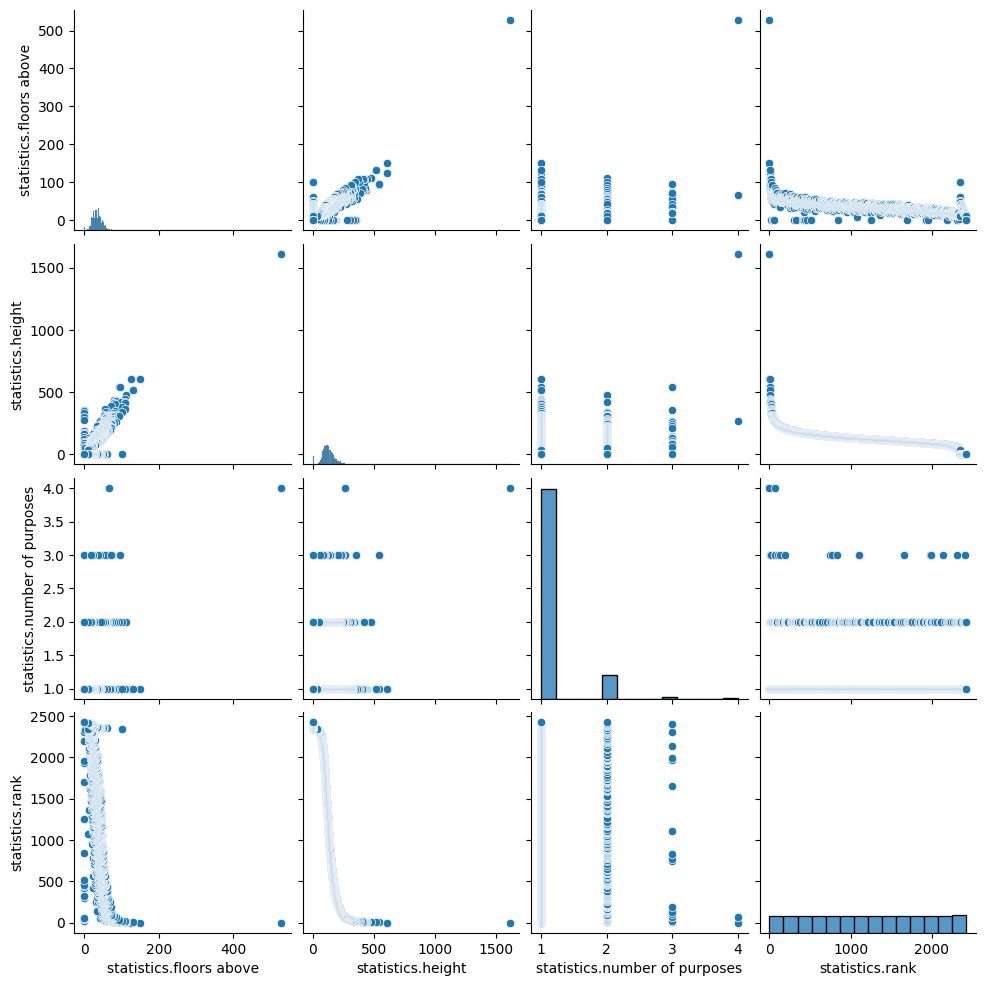

In [19]:
sns.pairplot(df[columns['statistics']])

<Axes: >

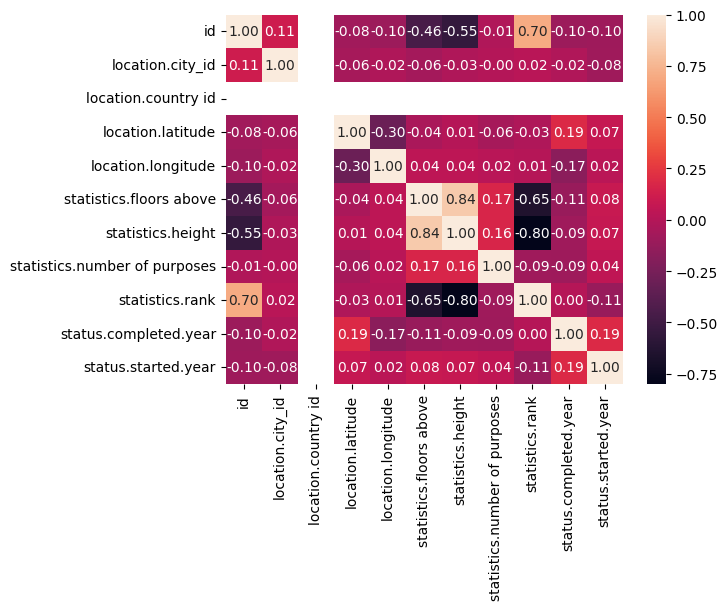

In [20]:
sns.heatmap(
    df.select_dtypes(include=np.number).corr(),
    annot=True,
    fmt = ".2f",
)

In [ ]:
# px.scatter_matrix(
#     pd.concat([df.select_dtypes(np.number), df[['location.city']]], axis=1),
#     height=1000,
#     width=1000,
#     color='location.city'
# )

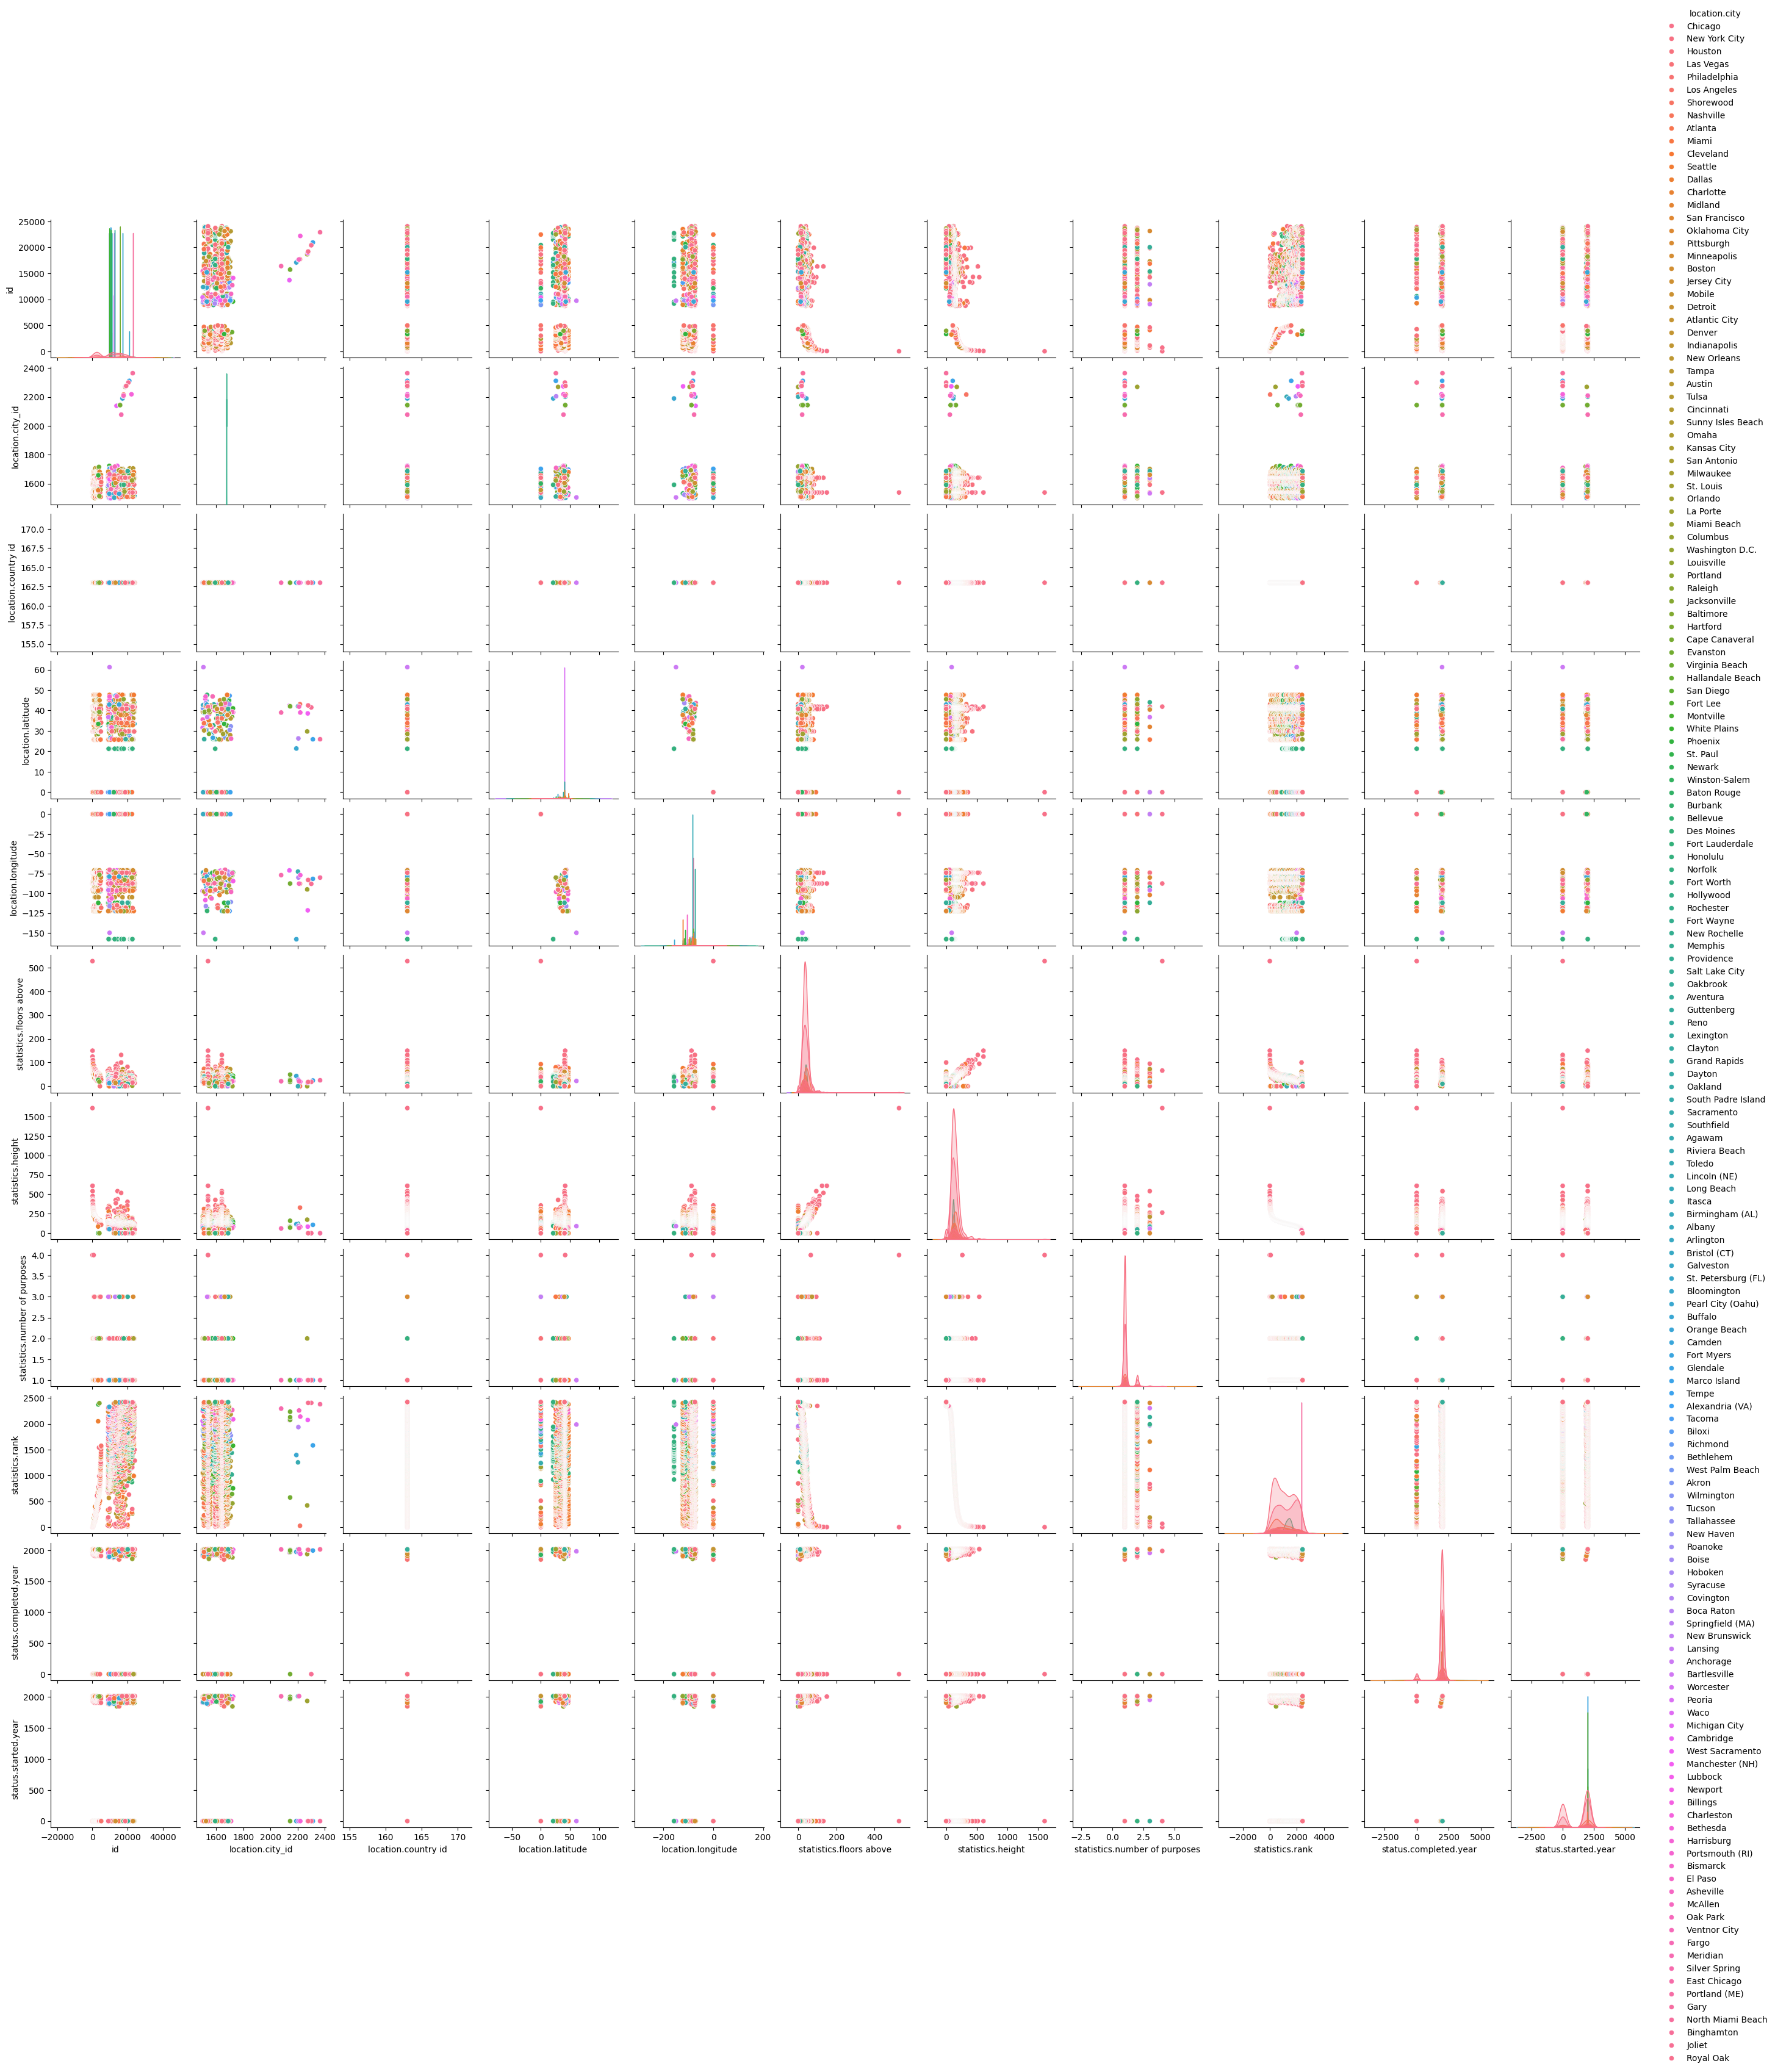

In [22]:
sns.pairplot(
    pd.concat([df.select_dtypes(np.number), df[['location.city']]], axis=1),
    hue='location.city'
)

In [27]:
city_to_state = {
    "Chicago": "Illinois",
    "New York City": "New York",
    "Houston": "Texas",
    "Las Vegas": "Nevada",
    "Philadelphia": "Pennsylvania",
    "Los Angeles": "California",
    "Shorewood": "Wisconsin",
    "Nashville": "Tennessee",
    "Atlanta": "Georgia",
    "Miami": "Florida",
    "Cleveland": "Ohio",
    "Seattle": "Washington",
    "Dallas": "Texas",
    "Charlotte": "North Carolina",
    "Midland": "Texas",
    "San Francisco": "California",
    "Oklahoma City": "Oklahoma",
    "Pittsburgh": "Pennsylvania",
    "Minneapolis": "Minnesota",
    "Boston": "Massachusetts",
    "Jersey City": "New Jersey",
    "Mobile": "Alabama",
    "Detroit": "Michigan",
    "Atlantic City": "New Jersey",
    "Denver": "Colorado",
    "Indianapolis": "Indiana",
    "New Orleans": "Louisiana",
    "Tampa": "Florida",
    "Austin": "Texas",
    "Tulsa": "Oklahoma",
    "Cincinnati": "Ohio",
    "Sunny Isles Beach": "Florida",
    "Omaha": "Nebraska",
    "Kansas City": "Missouri",
    "San Antonio": "Texas",
    "Milwaukee": "Wisconsin",
    "St. Louis": "Missouri",
    "Orlando": "Florida",
    "La Porte": "Indiana",
    "Miami Beach": "Florida",
    "Columbus": "Ohio",
    "Washington D.C.": "District of Columbia",
    "Louisville": "Kentucky",
    "Portland": "Oregon",
    "Raleigh": "North Carolina",
    "Jacksonville": "Florida",
    "Baltimore": "Maryland",
    "Hartford": "Connecticut",
    "Cape Canaveral": "Florida",
    "Evanston": "Illinois",
    "Virginia Beach": "Virginia",
    "Hallandale Beach": "Florida",
    "San Diego": "California",
    "Fort Lee": "New Jersey",
    "Montville": "New Jersey",
    "White Plains": "New York",
    "Phoenix": "Arizona",
    "St. Paul": "Minnesota",
    "Newark": "New Jersey",
    "Winston-Salem": "North Carolina",
    "Baton Rouge": "Louisiana",
    "Burbank": "California",
    "Bellevue": "Washington",
    "Des Moines": "Iowa",
    "Fort Lauderdale": "Florida",
    "Honolulu": "Hawaii",
    "Norfolk": "Virginia",
    "Fort Worth": "Texas",
    "Hollywood": "Florida",
    "Rochester": "New York",
    "Fort Wayne": "Indiana",
    "New Rochelle": "New York",
    "Memphis": "Tennessee",
    "Providence": "Rhode Island",
    "Salt Lake City": "Utah",
    "Oakbrook": "Illinois",
    "Aventura": "Florida",
    "Guttenberg": "New Jersey",
    "Reno": "Nevada",
    "Lexington": "Kentucky",
    "Clayton": "Missouri",
    "Grand Rapids": "Michigan",
    "Dayton": "Ohio",
    "Oakland": "California",
    "South Padre Island": "Texas",
    "Sacramento": "California",
    "Southfield": "Michigan",
    "Agawam": "Massachusetts",
    "Riviera Beach": "Florida",
    "Toledo": "Ohio",
    "Lincoln (NE)": "Nebraska",
    "Long Beach": "California",
    "Itasca": "Illinois",
    "Birmingham (AL)": "Alabama",
    "Albany": "New York",
    "Arlington": "Texas",
    "Bristol (CT)": "Connecticut",
    "Galveston": "Texas",
    "St. Petersburg (FL)": "Florida",
    "Bloomington": "Indiana",
    "Pearl City (Oahu)": "Hawaii",
    "Buffalo": "New York",
    "Orange Beach": "Alabama",
    "Camden": "New Jersey",
    "Fort Myers": "Florida",
    "Glendale": "California",
    "Marco Island": "Florida",
    "Tempe": "Arizona",
    "Alexandria (VA)": "Virginia",
    "Tacoma": "Washington",
    "Biloxi": "Mississippi",
    "Richmond": "Virginia",
    "Bethlehem": "Pennsylvania",
    "West Palm Beach": "Florida",
    "Akron": "Ohio",
    "Wilmington": "Delaware",
    "Tucson": "Arizona",
    "Tallahassee": "Florida",
    "New Haven": "Connecticut",
    "Roanoke": "Virginia",
    "Boise": "Idaho",
    "Hoboken": "New Jersey",
    "Syracuse": "New York",
    "Covington": "Kentucky",
    "Boca Raton": "Florida",
    "Springfield (MA)": "Massachusetts",
    "New Brunswick": "New Jersey",
    "Lansing": "Michigan",
    "Anchorage": "Alaska",
    "Bartlesville": "Oklahoma",
    "Worcester": "Massachusetts",
    "Peoria": "Illinois",
    "Waco": "Texas",
    "Michigan City": "Indiana",
    "Cambridge": "Massachusetts",
    "West Sacramento": "California",
    "Manchester (NH)": "New Hampshire",
    "Lubbock": "Texas",
    "Newport": "Rhode Island",
    "Billings": "Montana",
    "Charleston": "South Carolina",
    "Bethesda": "Maryland",
    "Harrisburg": "Pennsylvania",
    "Portsmouth (RI)": "Rhode Island",
    "Bismarck": "North Dakota",
    "El Paso": "Texas",
    "Asheville": "North Carolina",
    "McAllen": "Texas",
    "Oak Park": "Illinois",
    "Ventnor City": "New Jersey",
    "Fargo": "North Dakota",
    "Meridian": "Mississippi",
    "Silver Spring": "Maryland",
    "East Chicago": "Indiana",
    "Portland (ME)": "Maine",
    "Gary": "Indiana",
    "North Miami Beach": "Florida",
    "Binghamton": "New York",
    "Joliet": "Illinois",
    "Royal Oak": "Michigan",
}

In [32]:
df['location.state'] = df['location.city'].apply(lambda x: city_to_state[x])

C:\Users\ryany\AppData\Local\Temp\ipykernel_16944\4233014326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.state'] = df['location.city'].apply(lambda x: city_to_state[x])


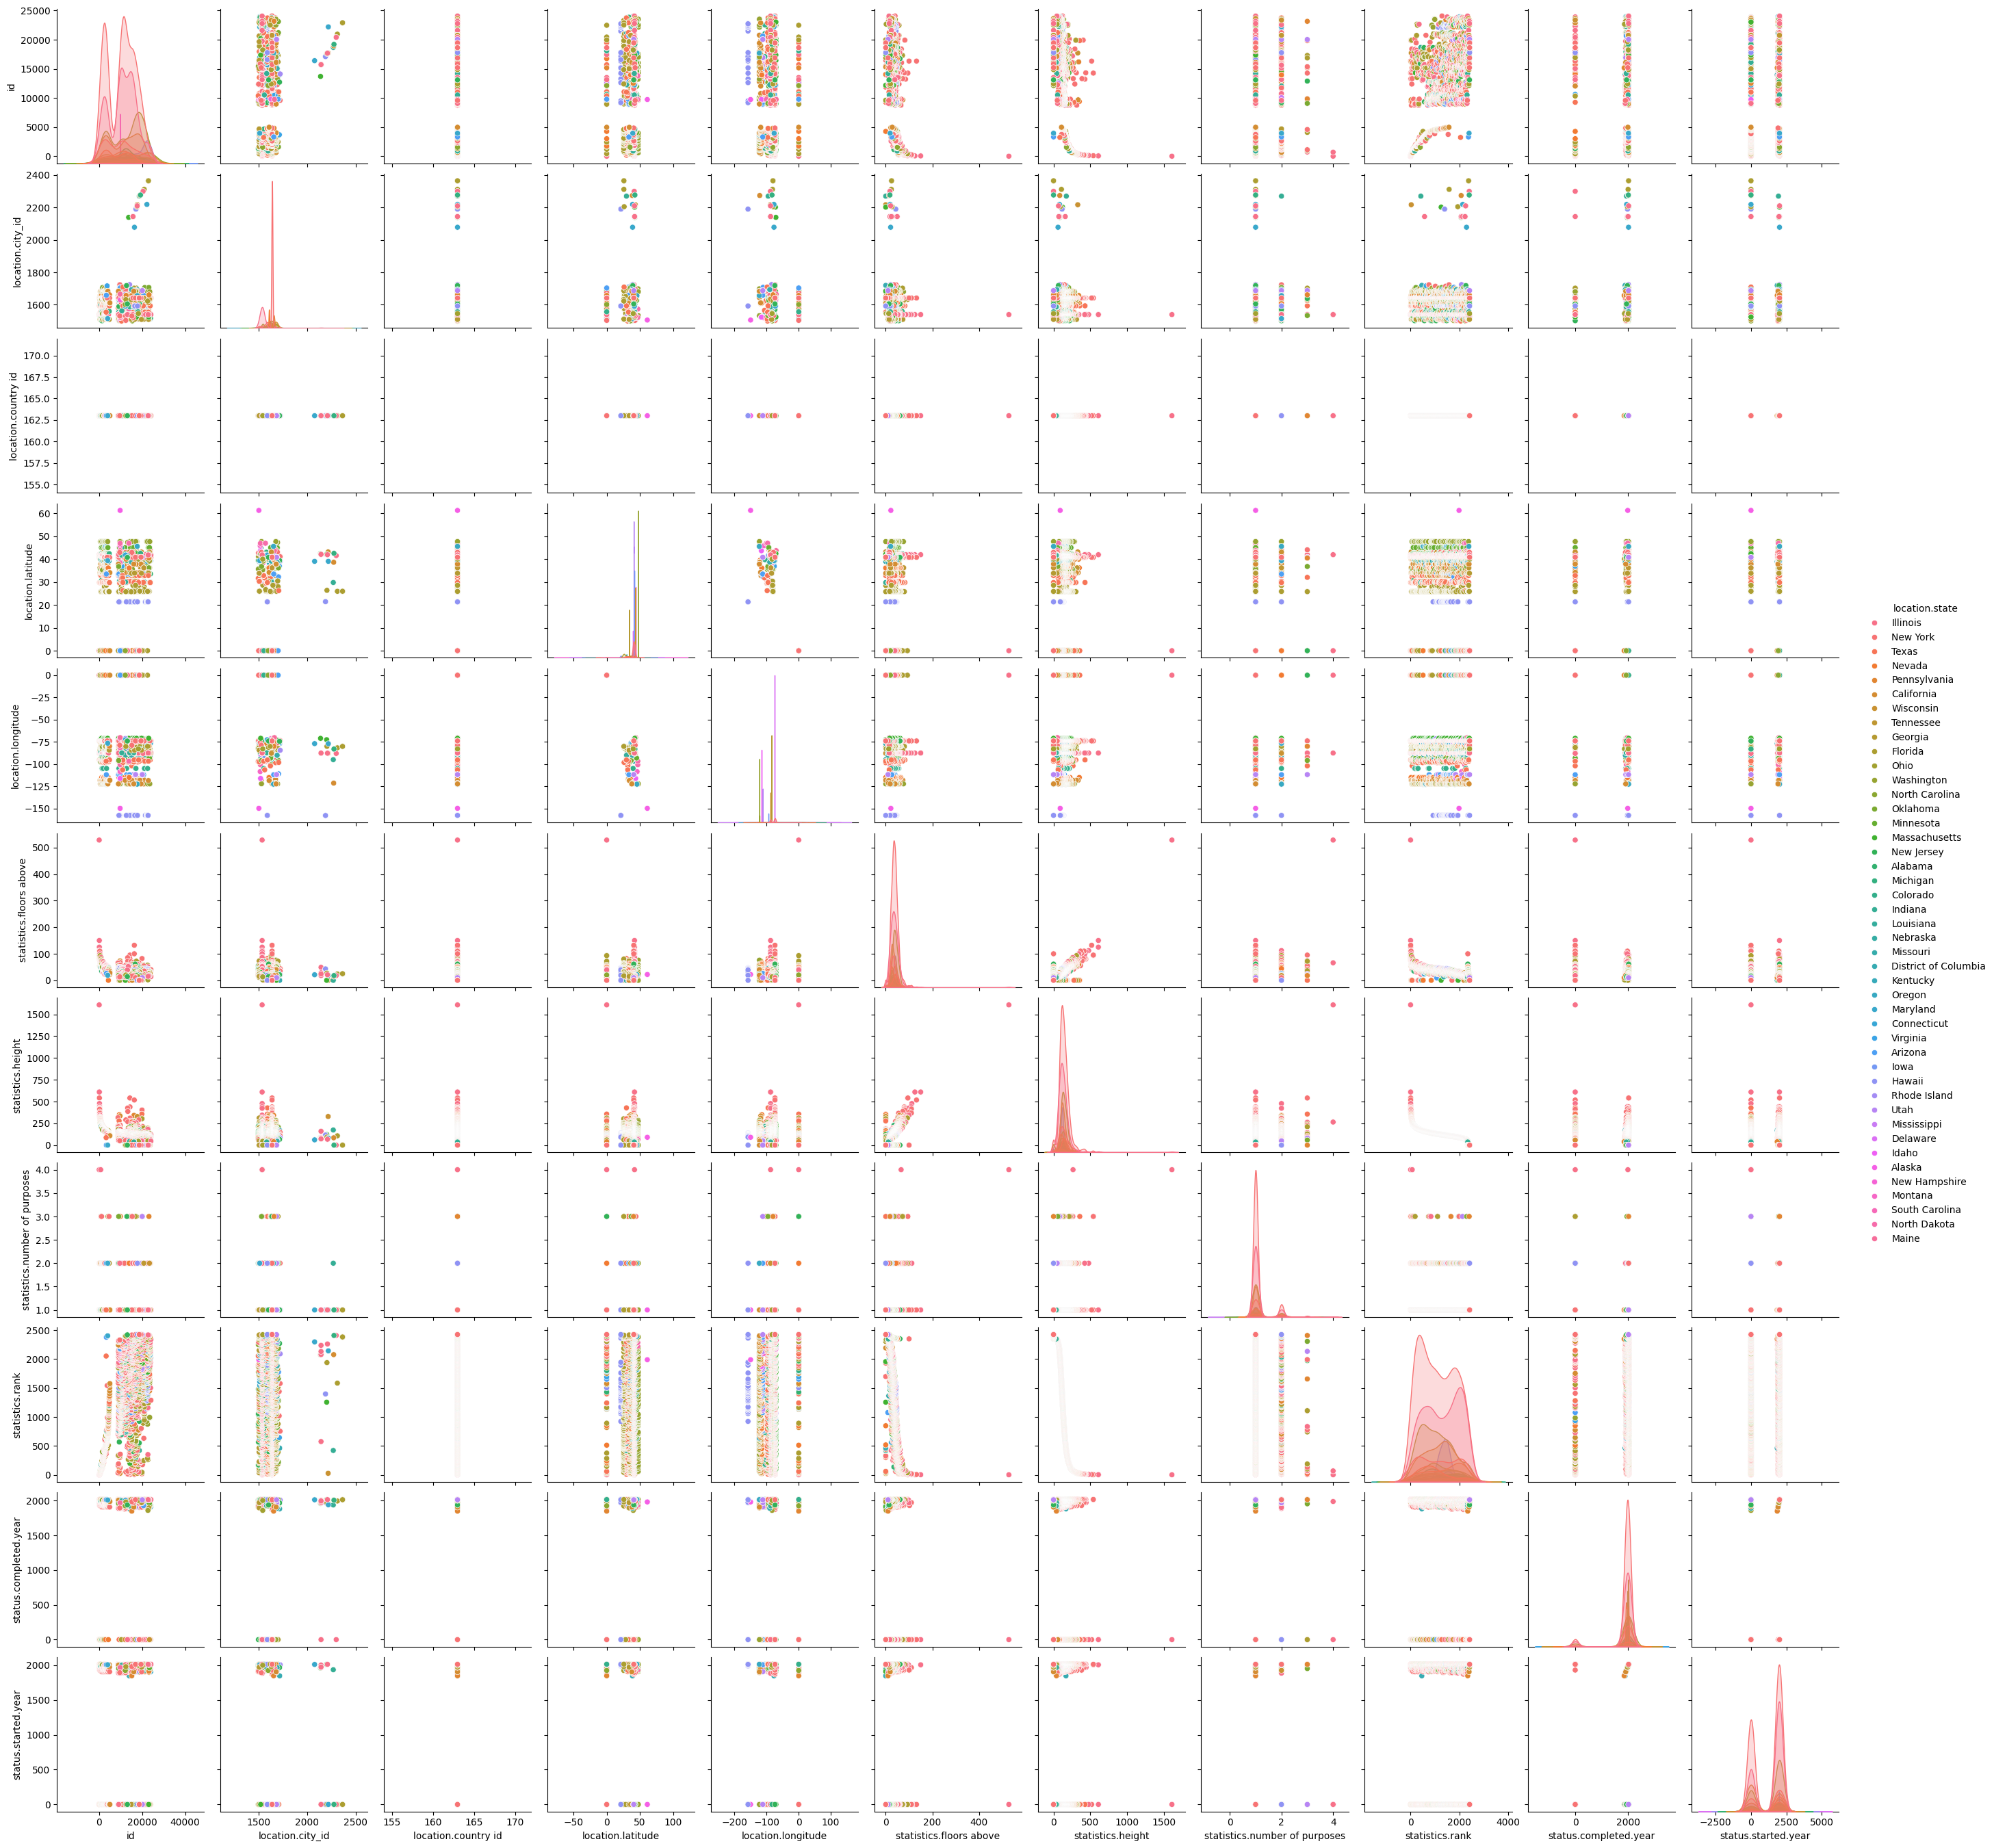

In [33]:
sns.pairplot(
    pd.concat([df.select_dtypes(np.number), df[['location.state']]], axis=1),
    hue='location.state'
)

In [34]:
state_to_division = {
    # New England Division
    "Connecticut": "New England",
    "Maine": "New England",
    "Massachusetts": "New England",
    "New Hampshire": "New England",
    "Rhode Island": "New England",
    "Vermont": "New England",
    
    # Mideast Division
    "Delaware": "Mideast",
    "Maryland": "Mideast",
    "New Jersey": "Mideast",
    "New York": "Mideast",
    "Pennsylvania": "Mideast",
    "District of Columbia": "Mideast",
    
    # Great Lakes Division
    "Illinois": "Great Lakes",
    "Indiana": "Great Lakes",
    "Michigan": "Great Lakes",
    "Ohio": "Great Lakes",
    "Wisconsin": "Great Lakes",
    
    # Plains Division
    "Iowa": "Plains",
    "Kansas": "Plains",
    "Minnesota": "Plains",
    "Missouri": "Plains",
    "Nebraska": "Plains",
    "North Dakota": "Plains",
    "South Dakota": "Plains",
    
    # Southeast Division
    "Alabama": "Southeast",
    "Arkansas": "Southeast",
    "Florida": "Southeast",
    "Georgia": "Southeast",
    "Kentucky": "Southeast",
    "Louisiana": "Southeast",
    "Mississippi": "Southeast",
    "North Carolina": "Southeast",
    "South Carolina": "Southeast",
    "Tennessee": "Southeast",
    "Virginia": "Southeast",
    "West Virginia": "Southeast",
    
    # Southwest Division
    "Arizona": "Southwest",
    "New Mexico": "Southwest",
    "Oklahoma": "Southwest",
    "Texas": "Southwest",
    
    # Rocky Mountain Division
    "Colorado": "Rocky Mountain",
    "Idaho": "Rocky Mountain",
    "Montana": "Rocky Mountain",
    "Utah": "Rocky Mountain",
    "Wyoming": "Rocky Mountain",
    
    # Far West Division
    "Alaska": "Far West",
    "California": "Far West",
    "Hawaii": "Far West",
    "Nevada": "Far West",
    "Oregon": "Far West",
    "Washington": "Far West",
}

In [36]:
df['location.division'] = df['location.state'].apply(lambda x: state_to_division[x])

C:\Users\ryany\AppData\Local\Temp\ipykernel_16944\3950168122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location.division'] = df['location.state'].apply(lambda x: state_to_division[x])


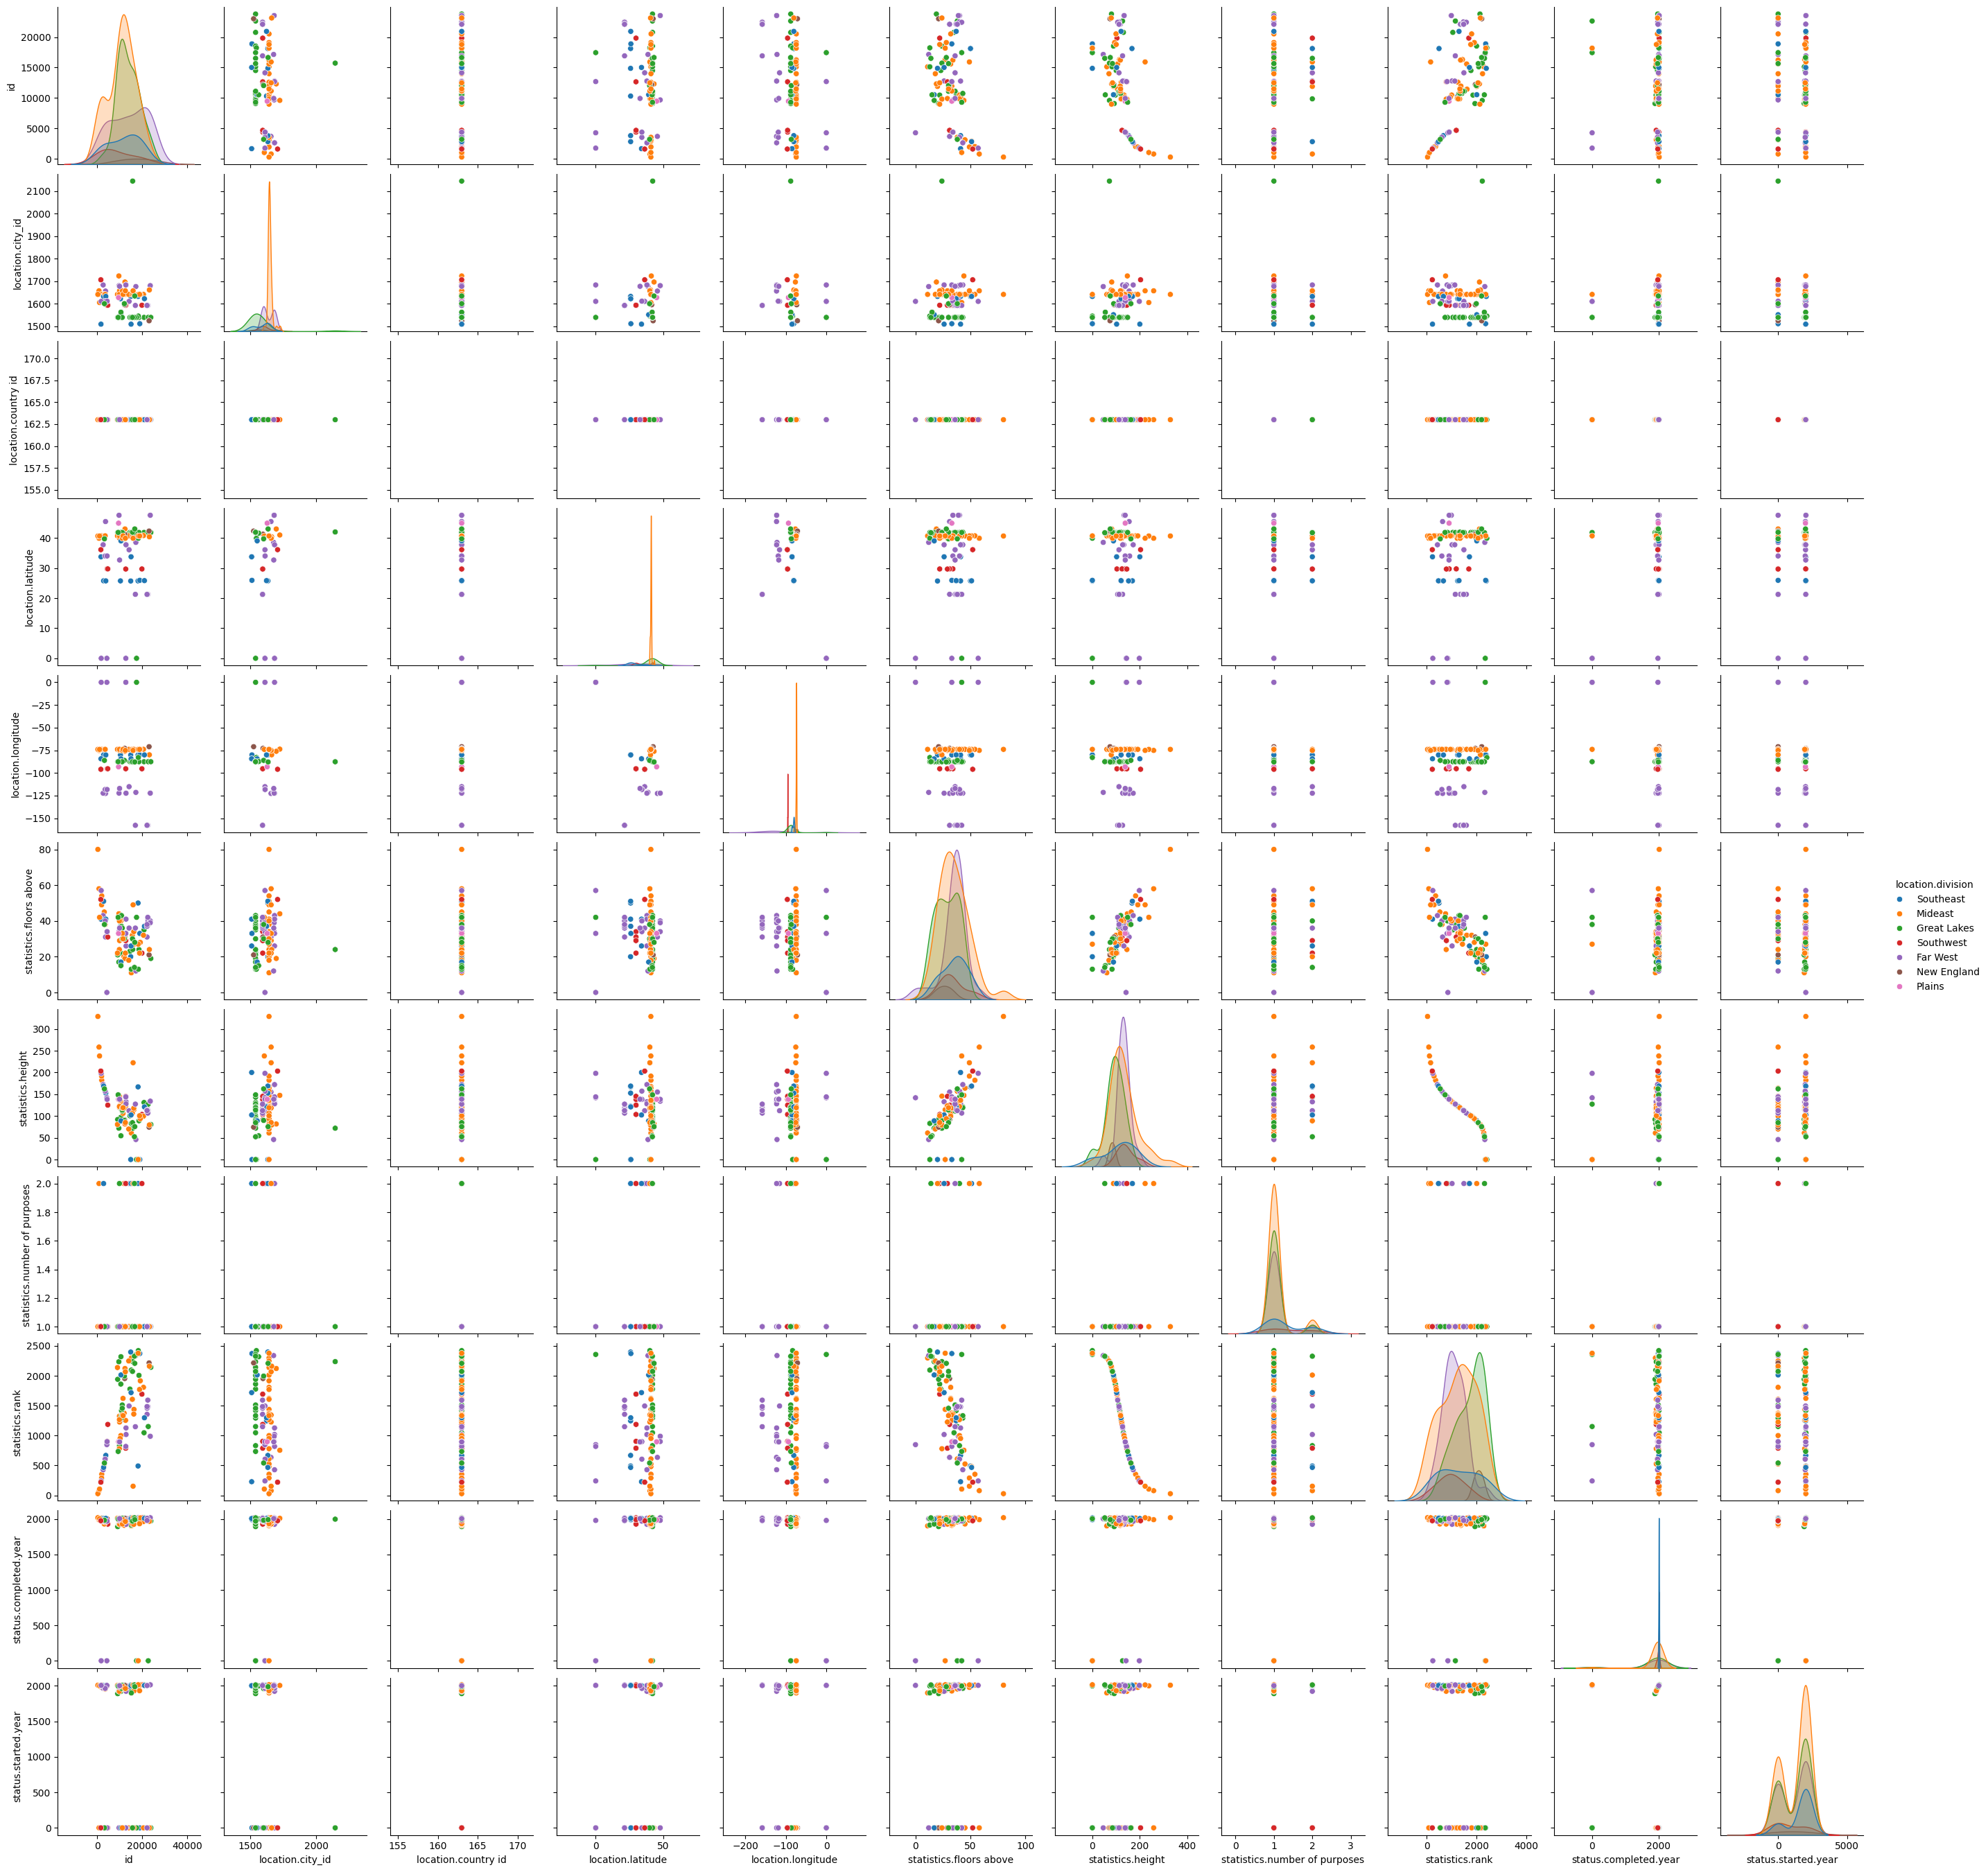

In [38]:
sns.pairplot(
    pd.concat([df.select_dtypes(np.number), df[['location.division']]], axis=1).sample(100),
    hue='location.division'
)

In [42]:
df['material'].value_counts()

material
concrete          1366
steel              874
composite          123
steel/concrete      33
concrete/steel      22
masonry              9
precast              3
Name: count, dtype: int64

In [46]:
df.shape

(2430, 43)

In [48]:
df['status.current'].unique()

array(['vision', 'never completed', 'completed', 'under construction',
       'demolished', 'proposed', 'structurally topped out',
       'architecturally topped out', 'on hold'], dtype=object)

In [49]:
df = df[df['status.current'] == 'completed'].shape

(2080, 43)

In [56]:
df.columns

Index(['id', 'material', 'name', 'location.city', 'location.city_id',
       'location.country', 'location.country id', 'location.latitude',
       'location.longitude', 'purposes.abandoned',
       'purposes.air traffic control tower', 'purposes.belltower',
       'purposes.bridge', 'purposes.casino', 'purposes.commercial',
       'purposes.education', 'purposes.exhibition', 'purposes.government',
       'purposes.hospital', 'purposes.hotel', 'purposes.industrial',
       'purposes.library', 'purposes.multiple', 'purposes.museum',
       'purposes.observation', 'purposes.office', 'purposes.other',
       'purposes.religious', 'purposes.residential', 'purposes.retail',
       'purposes.serviced apartments', 'purposes.telecommunications',
       'statistics.floors above', 'statistics.height',
       'statistics.number of purposes', 'statistics.rank', 'status.current',
       'status.completed.is completed', 'status.completed.year',
       'status.started.is started', 'status.started.yea

In [63]:
from sklearn.preprocessing import StandardScaler

In [101]:
px.scatter_geo(
    df,
    lat='location.latitude',
    lon='location.longitude',
    hover_name='location.city',
    scope='usa',
    size='statistics.height',
    size_max=40,
    opacity=0.1,
)